In [1]:
import pandas as pd
import numpy as np

C:\Users\kadam\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import zipfile
import os

zip_path = "second_print.zip"  # Path to ZIP file
extract_to = "second_dataset"  # Folder where it will be extracted

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted to: {extract_to}")


Extracted to: second_dataset


In [4]:
import csv

image_folder = "second_dataset/Second Print"  # Path to images
csv_file = "second.csv"

with open(csv_file, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["image_path", "label"])

    for image_name in os.listdir(image_folder):
        if image_name.endswith(".png"):  # Process PNG files
            label ="second" # Extract label (before '_')
            image_path = os.path.join(image_folder, image_name)
            writer.writerow([image_path, label])

print(f"CSV file created: {csv_file}")


CSV file created: second.csv


In [5]:
import pandas as pd

# Load CSV files
df1 = pd.read_csv("first.csv")
df2 = pd.read_csv("second.csv")

# Combine the two DataFrames
combined_df = pd.concat([df1, df2])

# Save the combined file
combined_df.to_csv("final_file.csv", index=False)


In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


csv_path = "final_file.csv" 
df = pd.read_csv(csv_path)

print(df.head())

                                          image_path  label
0  first_dataset/First Print\input_image_active (...  first
1  first_dataset/First Print\input_image_active (...  first
2  first_dataset/First Print\input_image_active (...  first
3  first_dataset/First Print\input_image_active (...  first
4   first_dataset/First Print\input_image_active.png  first


In [25]:
df["label"].replace({"first":1,"second":0},inplace=True)

C:\Users\kadam\AppData\Local\Temp\ipykernel_17588\1582545418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["label"].replace({"first":1,"second":0},inplace=True)
C:\Users\kadam\AppData\Local\Temp\ipykernel_17588\1582545418.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["label"].repla

In [26]:
image_paths = df["image_path"].values


In [27]:
def load_and_preprocess_image(image_path, target_size=(128, 128)):
    image = Image.open(image_path) 
    image = image.resize(target_size)
    image = np.array(image) / 255.0 
    if image.shape[-1] == 4:
        image = image[..., :3]
    return image


In [53]:
images = np.array([load_and_preprocess_image(img_path) for img_path in image_paths])

x_train, x_test, y_train, y_test = train_test_split(images, df["label"], test_size=0.3, random_state=42)

model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer
])

In [54]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

predictions = model.predict(x_test)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.4820 - loss: 3.7466 - val_accuracy: 0.4833 - val_loss: 0.6915
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 0.5202 - loss: 0.7626 - val_accuracy: 0.5500 - val_loss: 0.6620
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 142ms/step - accuracy: 0.5303 - loss: 0.6561 - val_accuracy: 0.7833 - val_loss: 0.6416
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8740 - loss: 0.6241 - val_accuracy: 0.9000 - val_loss: 0.5931
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.9118 - loss: 0.5615 - val_accuracy: 0.9000 - val_loss: 0.4922
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.9085 - loss: 0.4213 - val_accuracy: 0.8000 - val_loss: 0.3756
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.9315 - loss: 0.3041 - val_accuracy: 0.9833 - val_loss: 0.2219
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 0.9102 - loss: 0.2176 - val_accuracy: 0.9167 - val_loss:

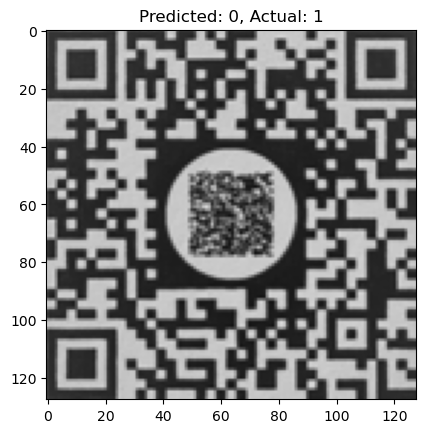

In [63]:
y_test = np.array(y_test)  # Ensure it's a NumPy array

plt.imshow(x_test[1])  # Display the test image
plt.title(f"Predicted: {np.argmax(predictions[1])}, Actual: {y_test[1]}")
plt.show()